In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_name = "clustering example data.csv"
data = pd.read_csv(file_name)

# Quick inspection of the data
print(data.head())

    X    Y
0 -42 -188
1 -89 -200
2 -19   -4
3 -33  -39
4 -60 -134


In [3]:
# Perform K-means clustering with k=2
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

C:\Users\lee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [4]:
# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Save the clustered data to a new CSV file
output_file = "clustered_data_k2.csv"
data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")

Clustered data saved to clustered_data_k2.csv


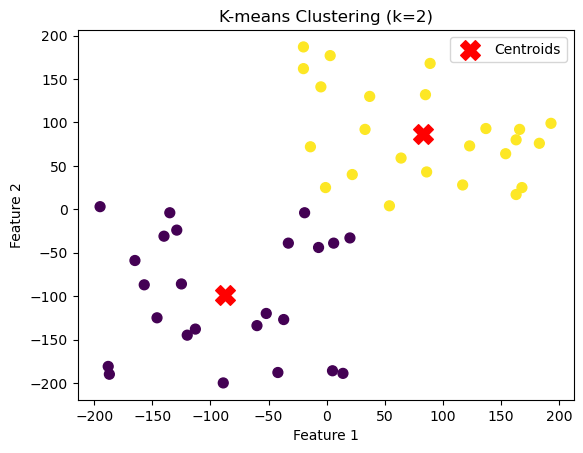

Inertia (within-cluster sum of squares) for k=2: 413800.625


In [5]:
# Visualize the clusters (if data is 2D or 3D)
if data.shape[1] - 1 == 2:  # Subtract 1 because 'Cluster' is added to the data
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['Cluster'], cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering (k=2)')
    plt.legend()
    plt.show()

# Print out the inertia (sum of squared distances to the nearest cluster center)
print(f"Inertia (within-cluster sum of squares) for k=2: {kmeans.inertia_}")